IMPORTS

In [1]:
%matplotlib inline  
import os
import numpy as np
import matplotlib.pyplot as plt
from smt.applications import EGO

import matplotlib.font_manager

import warnings
warnings.filterwarnings("ignore")
     
from scipy.stats import norm
from scipy.optimize import minimize

from smt.utils.options_dictionary import OptionsDictionary
from smt.applications.application import SurrogateBasedApplication
from smt.utils.misc import compute_rms_error

from smt.surrogate_models import KPLS, KRG, KPLSK
from smt.sampling_methods import LHS
from  case_generator2 import _import_case


In [2]:
namefun=['Branin_5','Set_1','Set_2','Wong1','Branin_1','Branin_2','Goldstein_1','Cos_1','Spiral','EVD52','Rosen-Suzuki']
namefun=['Branin_5']

suffix_xsave = '_xsave.npy'
suffix_ysave = '_ysave.npy'

(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)
(55, 1)


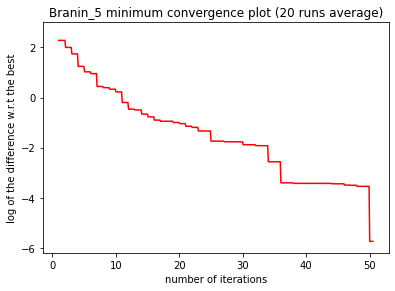

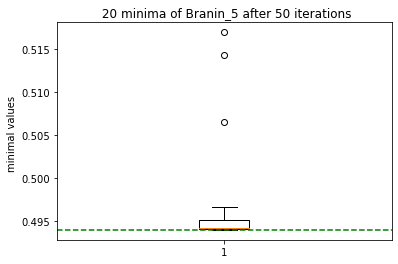

0.49398173863966477
[34]


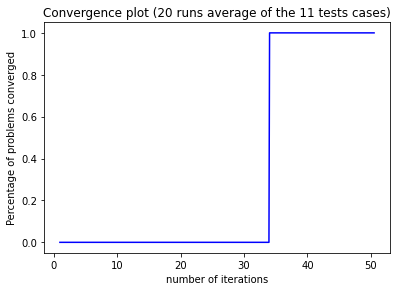

In [4]:
n_optim=20
n_doe=5
n_iter=50
p=[]
nb_pt_plot=10*n_iter
for base_save in namefun:
    converge=0
    
    dir_name='./results/'+base_save+"/"
   
    case=_import_case(base_save)()
    sol = case['sol']['value']
    
    
    y_data=np.zeros((n_optim,n_iter+n_doe))
    mini=np.zeros((n_optim,n_iter))
    for k in range(n_optim):
        filename= os.path.join(dir_name, base_save+"_"+str(k) +"_optim"+  suffix_ysave)
        yl=np.load(filename) 
             y_data[k,:]=yl.T[0]
        for i in range(n_iter) : 
            mini[k,i]=(np.min(yl[0:n_doe+i+1]))
    Moy_mini=mini.sum(axis=0)/n_optim
    y_opt=mini[:,-1]
    x_plot = np.linspace(1,n_iter+0.5, nb_pt_plot)
    y_plot_min=np.copy(x_plot)
    cst= np.linspace(sol,sol, nb_pt_plot)
    for i in range(nb_pt_plot) :
        y_plot_min[i]=np.log(np.abs(Moy_mini[int(np.floor(x_plot[i]))-1]-sol))
        if (y_plot_min[i] < -2 and not(converge)) : 
            converge=1 
            p.append(int(np.floor(x_plot[i])))

    if not(converge) :
        p.append(n_iter+1)
        
    u= max(np.floor(max(y_plot_min))+1,-100)
    l= max(np.floor(min(y_plot_min))-.2,-1000)
    fig= plt.figure()
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    epm, = axes.plot(x_plot,y_plot_min,color='r')
    axes.set_ylim([l,u])
    plt.title("{func} minimum convergence plot ({nopt} runs average)".format(func=base_save, nopt=n_optim), loc='center')
    plt.xlabel("number of iterations")
    plt.ylabel("log of the difference w.r.t the best")

    plt.savefig("./results/"+base_save+"/minimum convergence plot",dpi=300,quality=99)
      
    
    plt.show()
    plt.figure()
    plt.boxplot(y_opt)
    plt.title(" {nopt} minima of {func} after {niter} iterations".format(func=base_save, nopt=n_optim, niter=n_iter), loc='center')
    plt.plot(np.linspace(0.5,1.5,nb_pt_plot),cst,color='g',linestyle='--')
    plt.ylabel("minimal values ")
    plt.savefig("./results/"+base_save+"/minima after optim",dpi=300,quality=99)
    plt.show()
    print(np.min(y_opt))

p=np.array(p)
print(p)
for i in range(nb_pt_plot) :
    y_plot_min[i]=np.count_nonzero( ( p<=(int(np.floor(x_plot[i]))) )  )/np.shape(p)[0]

fig= plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
epm, = axes.plot(x_plot,y_plot_min,color='b')

plt.title("Convergence plot ({nopt} runs average of the 11 tests cases)".format(func=base_save, nopt=n_optim), loc='center')
plt.xlabel("number of iterations")
plt.ylabel("Percentage of problems converged")

plt.savefig("./results/overall problems convergence plot",dpi=300,quality=99)

plt.show()



94.0
51.0
[50.  8.  9. 31.  7.  4. 10. 10. 33. 50.  0. 29. 27.  5. 12.  9. 15. 42.
 32. 15. 17. 50.  6. 18. 19. 41. 15. 20. 29. 44.  2. 25.  3. 23.  9. 40.
  2. 11.  0.  9. 29. 17. 50. 16.  5. 11.  5. 26.  8.  8. 22. 11. 41. 34.
 18. 15.  8. 13. 50. 20.  8. 13.  3. 10. 13.  1. 20. 25. 22. 12. 22. 17.
 22. 20. 38.  0. 16.  7. 30. 18. 18.  6. 47. 27. 30.  0.  7. 24. 16.  2.
 15. 50. 17. 32. 23. 16. 24. 21. 23. 20.]


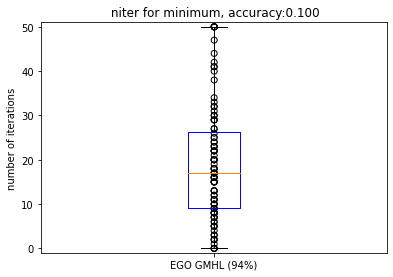

[50. 40. 42. 50. 23. 50. 41. 11. 50. 50. 50. 50. 50. 50. 13. 10. 17. 50.
 44. 50. 50. 50. 50. 35. 50. 45. 37. 23. 50. 50. 41. 50. 39. 43. 50. 50.
 25. 12. 20. 43. 50. 50. 50. 50. 50. 32. 50. 50. 50.  9. 33. 50. 42. 50.
 42. 50.  9. 37. 50. 49. 14. 14. 50. 17. 28. 30. 21. 50. 50. 50. 23. 48.
 50. 50. 46. 50. 50. 11. 31. 49. 41.  7. 50. 50. 43. 25.  8. 25. 50. 16.
 16. 50. 50. 49. 34. 50. 27. 50. 50. 50.]


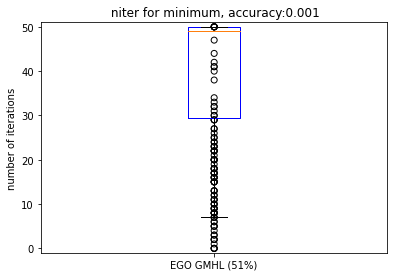

In [98]:
n_optim=100
n_doe=5
n_iter=50
nb_pt_plot=10*n_iter
for base_save in namefun:    
    dir_name='./results/'+base_save+"/"
    case=_import_case(base_save)()
    sol = case['sol']['value']
    y_data=np.zeros((n_optim,n_iter+n_doe))
    x_data=np.zeros((n_optim,n_iter+n_doe,11))

    mini=np.zeros((n_optim,n_iter+1))
    xmin=np.zeros((n_optim,n_iter+1,11))

    for k in range(n_optim):
        filename= os.path.join(dir_name, base_save+"_"+str(k) +"_optim"+  suffix_ysave)
        yl=np.load(filename) 
        y_data[k,:]=yl.T[0]
        filename= os.path.join(dir_name, base_save+"_"+str(k) +"_optim"+  suffix_xsave)
        xl=np.load(filename)
        x_data[k,:]=xl
        for i in range(n_iter+1) : 
            mini[k,i]=(np.min(yl[0:n_doe+i]))
            k2=np.argmin(yl[0:n_doe+i])
            xmin[k,i,:]=xl[k2]
    y_opt_0_1= mini[:,-1]
    y_opt_0_001= mini[:,-1]
    sucess_compt_0_1=0
    sucess_compt_0_001=0
    nb_ite_min_0_1= mini[:,-1]*0;
    nb_ite_min_0_001= mini[:,-1]*0;
    for i in range(n_optim):
        nb_ite_min_0_1[i]=n_iter
        nb_ite_min_0_001[i]=n_iter
        j=0
        sucess=0
        while j<n_iter+1 and sucess==0:
            if (np.abs(mini[i,j]-sol) < 0.1):
                nb_ite_min_0_1[i]=j
                sucess=1
            j=j+1
        j=0
        sucess=0
        while j<n_iter and sucess==0:
            if (np.abs(mini[i,j]-sol) < 0.001):
                nb_ite_min_0_001[i]=j+1
                sucess=1
            j=j+1
        
        perc_0_1=xmin[i,int(nb_ite_min_0_1[i]),-1]
        if nb_ite_min_0_1[i]>49:
            perc_0_1=0
        sucess_compt_0_1=sucess_compt_0_1+perc_0_1

        perc_0_001=xmin[i,int(nb_ite_min_0_001[i]),-1]
        if nb_ite_min_0_001[i]>49:
            perc_0_001=0
        sucess_compt_0_001=sucess_compt_0_001+perc_0_001
        
     #   y_opt_0_1[i]=
   # print(y_opt_0_1)
    
    print(sucess_compt_0_1)
    print(sucess_compt_0_001)    
    fig= plt.figure()
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    epm =  plt.boxplot(nb_ite_min_0_1, boxprops=dict( color='b'))
    points = plt.scatter(np.ones_like(nb_ite_min_0_1)+0.0012, nb_ite_min_0_1,facecolors='none',edgecolors='k')
    axes.set_ylim([-1,n_iter+1])
    print(nb_ite_min_0_1)
    plt.title(" niter for minimum, accuracy:0.100", loc='center')
    plt.ylabel("number of iterations")
    plt.xticks([1],['EGO GMHL ({perc}%)'.format(perc=np.int(sucess_compt_0_1))])
    plt.savefig("./results/"+base_save+"/tol_0_1",dpi=350,quality=99)
    plt.show()
    
    fig= plt.figure()
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    epm =  plt.boxplot(nb_ite_min_0_001, boxprops=dict( color='b'))
    points = plt.scatter(np.ones_like(nb_ite_min_0_001)+0.0012, nb_ite_min_0_1,facecolors='none',edgecolors='k')
    axes.set_ylim([-1,n_iter+1])
    plt.xticks([1],['EGO GMHL ({perc}%)'.format(perc=np.int(sucess_compt_0_001))])
  
    print(nb_ite_min_0_001)
    plt.title(" niter for minimum, accuracy:0.001", loc='center')
    plt.ylabel("number of iterations")
    plt.savefig("./results/"+base_save+"/tol_0_001",dpi=350,quality=99)
    plt.show()
    